In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt

In [2]:
rf = pd.read_csv("rfTestMisclassified_UpdateHP.csv")

In [3]:
nb = pd.read_csv("nbTestMisclassified.csv")

In [4]:
nb.shape

(8, 22)

In [5]:
rf.shape

(11, 22)

In [6]:
ids = rf['Unnamed: 0'].reset_index().rename(columns={'Unnamed: 0':"rfID"}).merge(
    nb['Unnamed: 0'].reset_index().rename(columns={'Unnamed: 0':"nbID"}),
    left_on="rfID", right_on="nbID", how="outer"
)[["rfID", "nbID"]]

In [7]:
nbOnly = ids[np.isnan(ids["rfID"])]['nbID']

In [8]:
rfOnly = ids[np.isnan(ids["nbID"])]["rfID"]

In [9]:
both = ids[(~np.isnan(ids["nbID"])) & (~np.isnan(ids["rfID"]))]["rfID"]

In [10]:
nbOnlydf = nb[nb["Unnamed: 0"].isin(nbOnly)]

In [11]:
rfOnlydf = rf[rf["Unnamed: 0"].isin(rfOnly)]

In [12]:
bothRF = rf[rf["Unnamed: 0"].isin(both)]
bothNB = nb[nb["Unnamed: 0"].isin(both)]

In [13]:
bothNB

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,predicted
0,8396,2022-03-11,12:56:17.67,39.421,-110.306,-2.2,mis,-0.45,0.04,-0.06,...,12.72,12.38,-0.02,0.01,0.03,-0.03,0.09,0.21,2,0
1,3699,2019-12-17,07:13:46.30,39.413,-110.306,-1.8,mis,-0.23,0.04,0.05,...,13.31,12.86,-0.15,-0.17,-0.30,-0.20,NaN,0.35,2,0
5,1359,2015-03-23,18:07:34.04,40.521,-112.154,-2.0,ex,-0.26,0.41,0.12,...,12.89,12.64,0.10,0.04,0.17,0.34,0.41,0.53,0,2
7,1651,2015-10-13,01:02:14.31,40.607,-109.531,-2.0,ex,-0.40,-0.35,-0.52,...,14.17,14.53,0.02,-0.01,-0.04,0.04,0.16,0.23,0,1


In [14]:
bothRF

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,prediction
0,8396,2022-03-11,12:56:17.67,39.421,-110.306,-2.2,mis,-0.45,0.04,-0.06,...,12.72,12.38,-0.02,0.01,0.03,-0.03,0.09,0.21,2,0
1,3699,2019-12-17,07:13:46.30,39.413,-110.306,-1.8,mis,-0.23,0.04,0.05,...,13.31,12.86,-0.15,-0.17,-0.30,-0.20,NaN,0.35,2,0
7,1359,2015-03-23,18:07:34.04,40.521,-112.154,-2.0,ex,-0.26,0.41,0.12,...,12.89,12.64,0.10,0.04,0.17,0.34,0.41,0.53,0,2
10,1651,2015-10-13,01:02:14.31,40.607,-109.531,-2.0,ex,-0.40,-0.35,-0.52,...,14.17,14.53,0.02,-0.01,-0.04,0.04,0.16,0.23,0,1


In [15]:
rfOnlydf

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,prediction
2,1889,2016-05-05,22:23:14.54,40.623,-109.507,-2.0,ex,-0.12,-0.37,-0.47,...,15.24,14.64,0.13,0.14,0.14,0.10,0.14,0.16,0,1
3,7500,2021-09-08,00:36:37.12,39.433,-110.317,-1.6,mis,-0.67,-0.33,-0.44,...,13.43,13.33,0.05,0.08,0.03,-0.06,0.23,0.16,2,0
4,7470,2021-09-02,05:43:22.92,39.430,-110.300,-2.0,mis,-0.21,0.19,0.17,...,15.31,12.64,0.00,0.31,0.21,-0.01,0.55,0.65,2,0
5,8832,2022-07-29,07:08:19.74,39.428,-110.303,-1.7,mis,-0.20,0.22,0.37,...,13.38,12.48,0.00,0.32,0.10,NaN,NaN,0.66,2,0
6,2738,2018-01-18,17:12:25.43,40.614,-109.514,-2.0,ex,-0.31,-0.22,-0.38,...,14.93,14.15,0.08,0.08,0.17,0.10,0.16,0.07,0,1
8,6717,2020-11-20,02:51:36.47,39.720,-110.733,-2.2,mis,-0.42,-0.19,-0.24,...,13.46,13.53,0.01,-0.01,0.07,-0.03,0.79,0.78,2,0
9,2959,2018-08-18,18:18:26.54,38.982,-111.365,-1.9,mis,-0.54,0.20,-0.06,...,12.66,12.70,0.07,0.07,0.01,-0.17,0.25,0.06,2,0


In [16]:
nbOnlydf

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,predicted
2,836,2014-03-23,06:03:51.77,40.562,-111.263,13.3,eq,-0.17,0.89,0.57,...,13.82,13.75,NaN,0.08,0.08,0.09,NaN,0.07,1,0
3,1280,2015-01-24,15:06:24.93,40.830,-111.384,12.9,eq,-0.13,0.82,0.46,...,15.68,14.30,NaN,0.40,0.29,0.41,NaN,-0.12,1,0
4,2062,2016-09-11,20:52:48.00,40.509,-112.169,-2.0,ex,-0.23,0.15,0.02,...,13.67,12.74,0.15,0.19,0.31,0.24,0.38,0.53,0,2
6,1880,2016-04-24,23:12:09.72,40.696,-111.480,10.7,eq,0.29,0.86,0.87,...,14.91,13.98,NaN,0.21,0.16,0.25,NaN,0.10,1,0


In [17]:
nb

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,predicted
0,8396,2022-03-11,12:56:17.67,39.421,-110.306,-2.2,mis,-0.45,0.04,-0.06,...,12.72,12.38,-0.02,0.01,0.03,-0.03,0.09,0.21,2,0
1,3699,2019-12-17,07:13:46.30,39.413,-110.306,-1.8,mis,-0.23,0.04,0.05,...,13.31,12.86,-0.15,-0.17,-0.30,-0.20,NaN,0.35,2,0
2,836,2014-03-23,06:03:51.77,40.562,-111.263,13.3,eq,-0.17,0.89,0.57,...,13.82,13.75,NaN,0.08,0.08,0.09,NaN,0.07,1,0
3,1280,2015-01-24,15:06:24.93,40.830,-111.384,12.9,eq,-0.13,0.82,0.46,...,15.68,14.30,NaN,0.40,0.29,0.41,NaN,-0.12,1,0
4,2062,2016-09-11,20:52:48.00,40.509,-112.169,-2.0,ex,-0.23,0.15,0.02,...,13.67,12.74,0.15,0.19,0.31,0.24,0.38,0.53,0,2
5,1359,2015-03-23,18:07:34.04,40.521,-112.154,-2.0,ex,-0.26,0.41,0.12,...,12.89,12.64,0.10,0.04,0.17,0.34,0.41,0.53,0,2
6,1880,2016-04-24,23:12:09.72,40.696,-111.480,10.7,eq,0.29,0.86,0.87,...,14.91,13.98,NaN,0.21,0.16,0.25,NaN,0.10,1,0
7,1651,2015-10-13,01:02:14.31,40.607,-109.531,-2.0,ex,-0.40,-0.35,-0.52,...,14.17,14.53,0.02,-0.01,-0.04,0.04,0.16,0.23,0,1


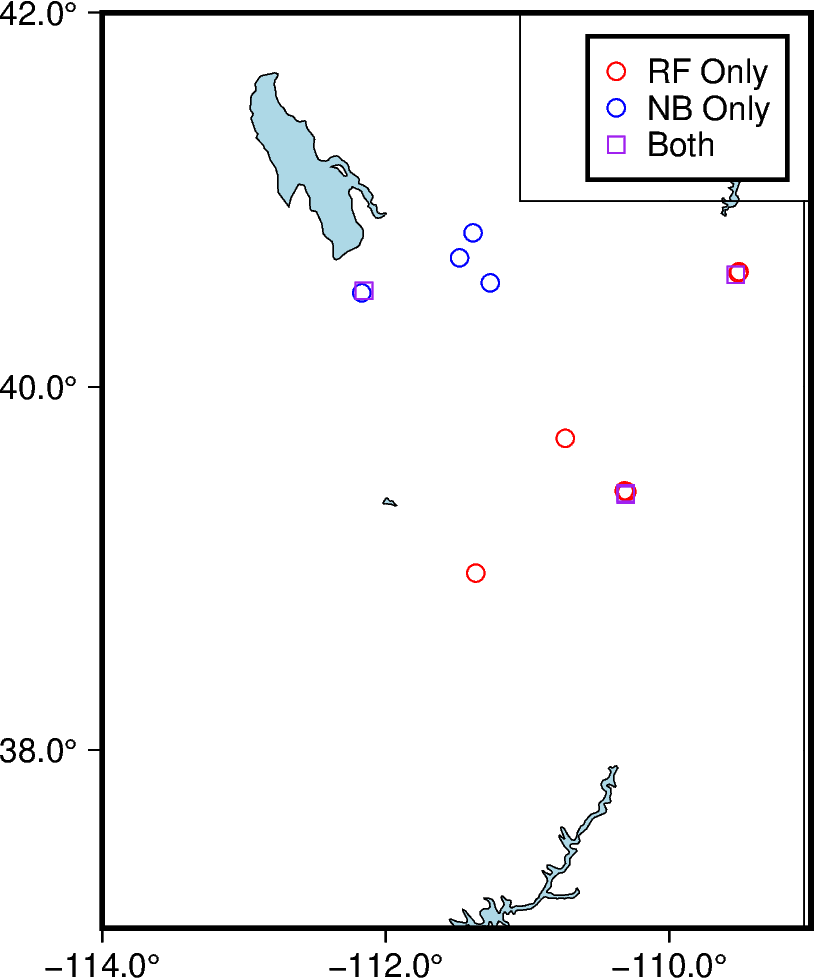

In [18]:
fig = pygmt.Figure()

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT='8p', FONT_ANNOT_PRIMARY='8p')
# Generate a map near Washington State showing land, water, and shorelines
fig.coast(
    region=[-114, -109, 37, 42],
    projection="M6c",
    land="white",
    water="lightblue",
    shorelines=True,
    frame="a",
    borders=2
)

act_shape = ["c", "s", "t"]
pred_color = ["white", "black", "gray"]

fig.plot(data=rfOnlydf[["Elon", "Elat"]], style="c0.15c", pen="0.35p,red", label="RF Only")
fig.plot(data=nbOnlydf[["Elon", "Elat"]], style="c0.15c", pen="0.35p,blue", label="NB Only")
fig.plot(data=bothRF[["Elon", "Elat"]], style="s0.2c", pen="0.35p,purple", label="Both")

fig.legend()

fig.show()

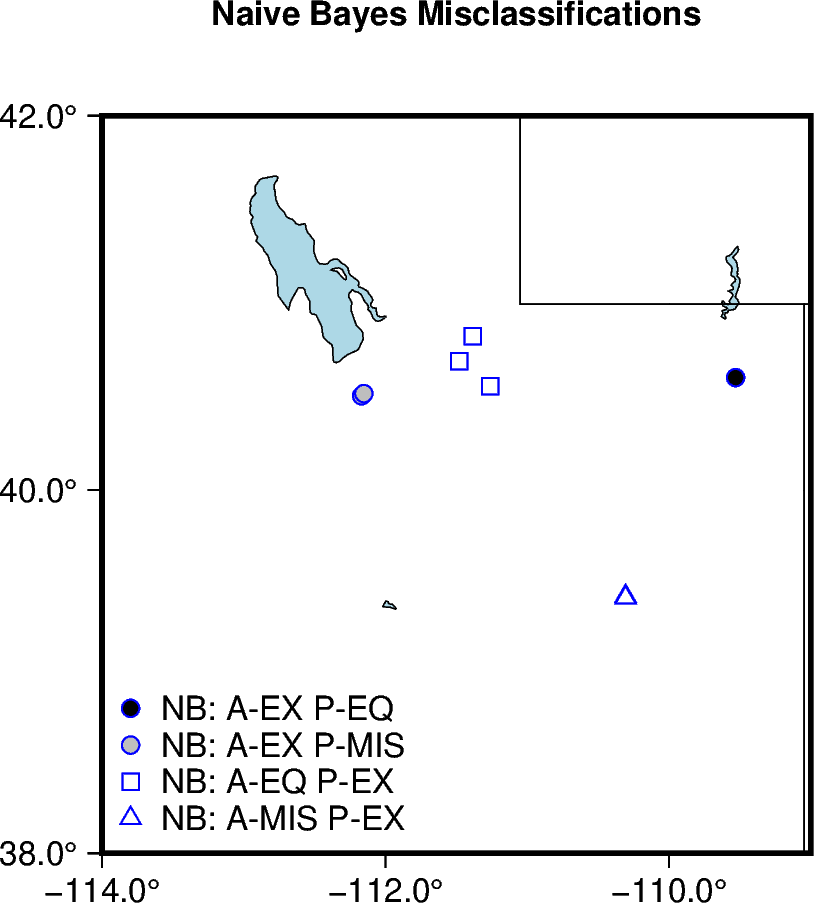

In [19]:
fig = pygmt.Figure()

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT='8p', FONT_ANNOT_PRIMARY='8p')
# Generate a map near Washington State showing land, water, and shorelines
fig.coast(
    region=[-114, -109, 38, 42],
    projection="M6c",
    land="white",
    water="lightblue",
    shorelines=True,
    frame=["a", '+t"Naive Bayes Misclassifications"'],
    borders=2
)

act_shape = ["c", "s", "t"]
pred_color = ["white", "black", "gray"]
size = [0.15, 0.2, 0.2]
labels=["EX", "EQ", "MIS"]

for act in [0, 1, 2]:
    for pred in [0, 1, 2]:
        nbMatch = nb[(nb["y"] == act )
                        & (nb["predicted"] == pred)]
        if len(nbMatch) > 0:
            fig.plot(data=nbMatch[["Elon", "Elat"]], 
                    style=f"{act_shape[act]}{size[act]}c", 
                    pen="0.35p,blue",
                    fill = pred_color[pred], 
                    label=f"NB: A-{labels[act]} P-{labels[pred]}")
        # fig.plot(data=bothRF[["Elon", "Elat"]], 
        #         style=f"{act_shape[act]}0.15c", 
        #         pen="0.35p,purple",
        #         fill = pred_color[pred])

fig.legend(position="jBL+w1")
fig.show()

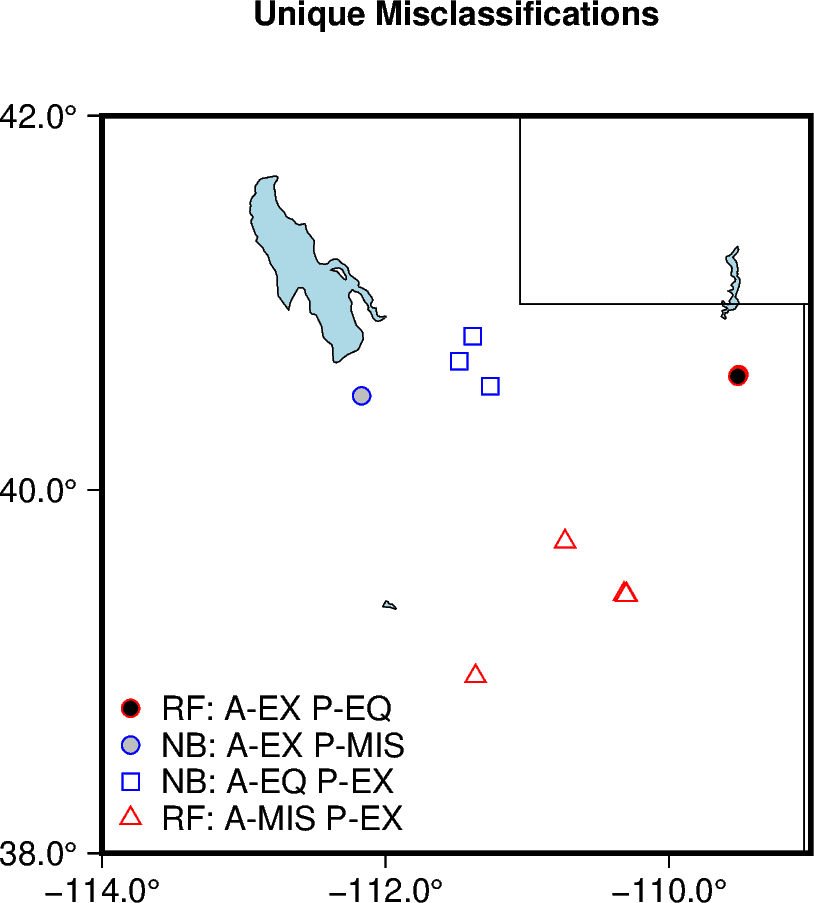

In [20]:
fig = pygmt.Figure()

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT='8p', FONT_ANNOT_PRIMARY='8p')
# Generate a map near Washington State showing land, water, and shorelines
fig.coast(
    region=[-114, -109, 38, 42],
    projection="M6c",
    land="white",
    water="lightblue",
    shorelines=True,
    frame=["a", '+t"Unique Misclassifications"'],
    borders=2
)

act_shape = ["c", "s", "t"]
pred_color = ["white", "black", "gray"]
size = [0.15, 0.2, 0.2]
labels=["EX", "EQ", "MIS"]

for act in [0, 1, 2]:
    for pred in [0, 1, 2]:
        rfMatch = rfOnlydf[(rfOnlydf["y"] == act )
                               & (rfOnlydf["prediction"] == pred)]
        nbMatch = nbOnlydf[(nbOnlydf["y"] == act )
                        & (nbOnlydf["predicted"] == pred)]
        if len(rfMatch) > 0:
            fig.plot(data=rfMatch[["Elon", "Elat"]], 
                    style=f"{act_shape[act]}{size[act]}c", 
                    pen="0.35p,red",
                    fill = pred_color[pred], 
                    label=f"RF: A-{labels[act]} P-{labels[pred]}")
        if len(nbMatch) > 0:
            fig.plot(data=nbMatch[["Elon", "Elat"]], 
                    style=f"{act_shape[act]}{size[act]}c", 
                    pen="0.35p,blue",
                    fill = pred_color[pred], 
                    label=f"NB: A-{labels[act]} P-{labels[pred]}")
        # fig.plot(data=bothRF[["Elon", "Elat"]], 
        #         style=f"{act_shape[act]}0.15c", 
        #         pen="0.35p,purple",
        #         fill = pred_color[pred])

fig.legend(position="jBL+w1")
fig.show()

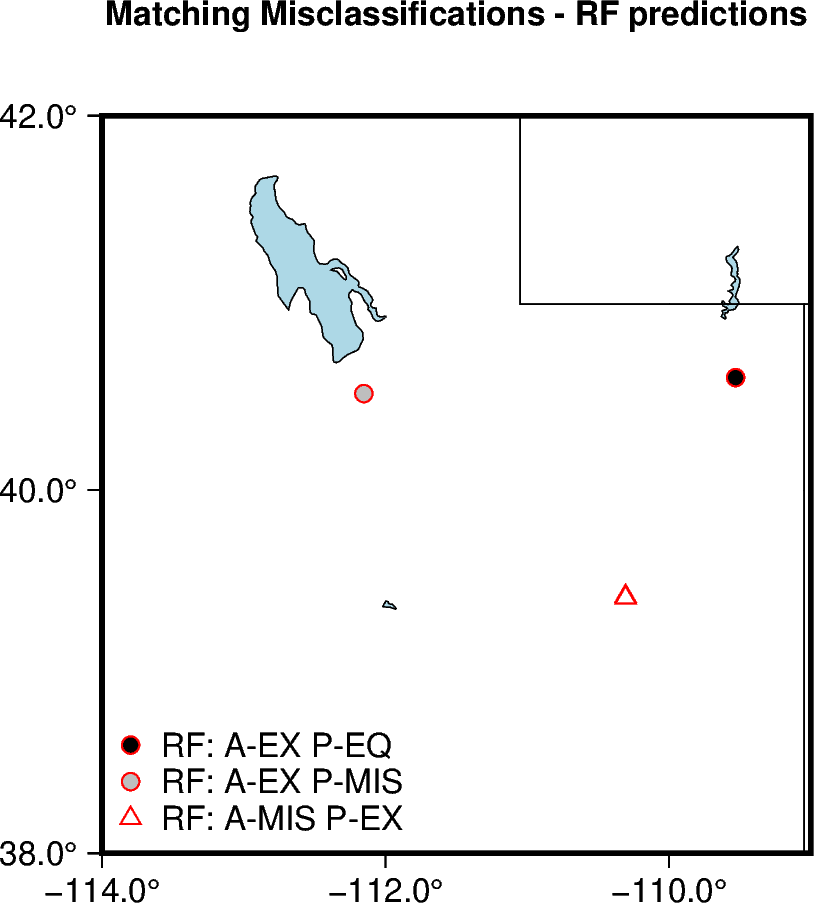

In [21]:
fig = pygmt.Figure()

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT='8p', FONT_ANNOT_PRIMARY='8p')
# Generate a map near Washington State showing land, water, and shorelines
fig.coast(
    region=[-114, -109, 38, 42],
    projection="M6c",
    land="white",
    water="lightblue",
    shorelines=True,
    frame=["a", '+t"Matching Misclassifications - RF predictions"'],
    borders=2
)

act_shape = ["c", "s", "t"]
pred_color = ["white", "black", "gray"]
size = [0.15, 0.2, 0.2]
labels=["EX", "EQ", "MIS"]

for act in [0, 1, 2]:
    for pred in [0, 1, 2]:
        rfMatch = bothRF[(bothRF["y"] == act )
                               & (bothRF["prediction"] == pred)]
        if len(rfMatch) > 0:
            fig.plot(data=rfMatch[["Elon", "Elat"]], 
                    style=f"{act_shape[act]}{size[act]}c", 
                    pen="0.35p,red",
                    fill = pred_color[pred], 
                    label=f"RF: A-{labels[act]} P-{labels[pred]}")
        # fig.plot(data=bothRF[["Elon", "Elat"]], 
        #         style=f"{act_shape[act]}0.15c", 
        #         pen="0.35p,purple",
        #         fill = pred_color[pred])

fig.legend(position="jBL+w1")
fig.show()

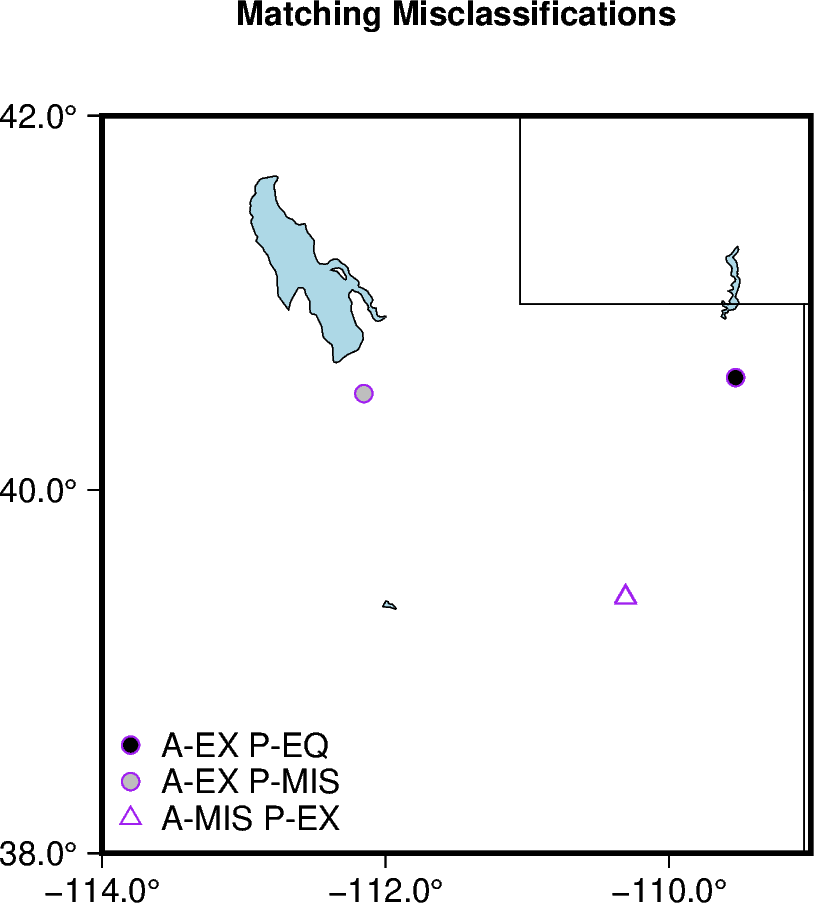

In [22]:
fig = pygmt.Figure()

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT='8p', FONT_ANNOT_PRIMARY='8p')
# Generate a map near Washington State showing land, water, and shorelines
fig.coast(
    region=[-114, -109, 38, 42],
    projection="M6c",
    land="white",
    water="lightblue",
    shorelines=True,
    frame=["a", '+t"Matching Misclassifications"'],
    borders=2
)

act_shape = ["c", "s", "t"]
pred_color = ["white", "black", "gray"]
size = [0.15, 0.2, 0.2]
labels=["EX", "EQ", "MIS"]

for act in [0, 1, 2]:
    for pred in [0, 1, 2]:
        nbMatch = bothNB[(bothNB["y"] == act )
                        & (bothNB["predicted"] == pred)]
        if len(nbMatch) > 0:
            fig.plot(data=nbMatch[["Elon", "Elat"]], 
                    style=f"{act_shape[act]}{size[act]}c", 
                    pen="0.35p,purple",
                    fill = pred_color[pred], 
                    label=f"A-{labels[act]} P-{labels[pred]}")
        # fig.plot(data=bothRF[["Elon", "Elat"]], 
        #         style=f"{act_shape[act]}0.15c", 
        #         pen="0.35p,purple",
        #         fill = pred_color[pred])

fig.legend(position="jBL+w1")
fig.show()